# Classificação Linear

**Equação da reta:**
 $
 ax + bx + c = 0
 $



In [26]:
import numpy as np
import matplotlib.pyplot as plt
a = -1
b = 4
c = 0.4

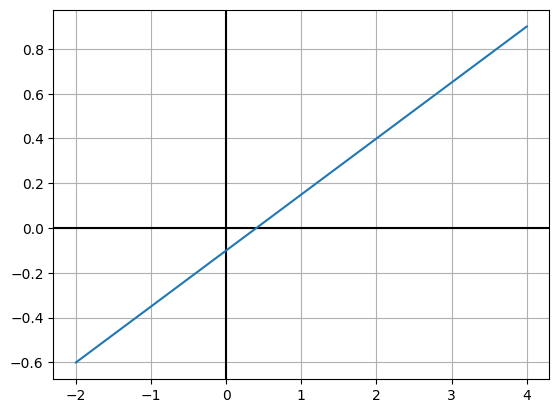

In [27]:
def plotline(a,b,c):
  x = np.linspace(-2, 4, 50)
  y = (-a*x-c)/b
  plt.axvline(0, -1, 1, color='k')
  plt.axhline(0, -2, 4, color='k')
  plt.plot(x,y)
  plt.grid(True)

plotline(a,b,c)

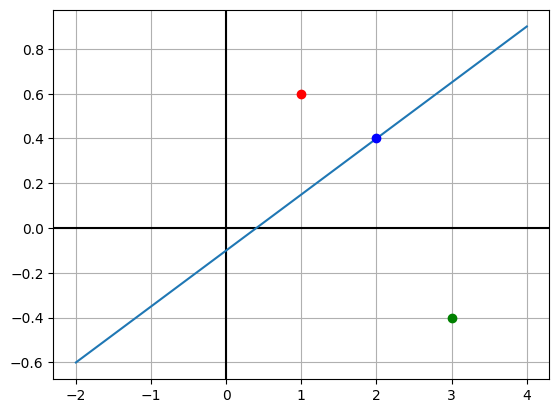

In [28]:
p1 = (2, 0.4)
p2 = (1, 0.6)
p3 = (3, -0.4)

plotline(a, b, c)
plt.plot(p1[0], p1[1], color='b', marker = 'o')
plt.plot(p2[0], p2[1], color='r', marker = 'o')
plt.plot(p3[0], p3[1], color='g', marker = 'o')

In [29]:
ret1 = a*p1[0] + b*p1[1] + c
ret2 = a*p2[0] + b*p2[1] + c
ret3 = a*p3[0] + b*p3[1] + c

print("%.2f "% ret1)
print("%.2f "% ret2)
print("%.2f "% ret3)

0.00 
1.80 
-4.20 


### Exercício 3

In [30]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [45]:
np.random.seed(46)
X,Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                          n_clusters_per_class=1)

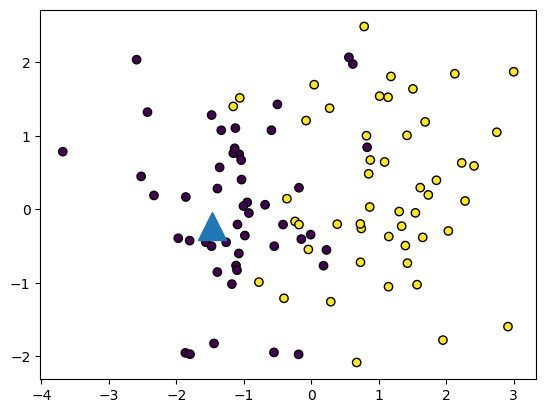

In [46]:
p = X[10]
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')
plt.plot(p[0],p[1], marker='^', markersize=20)

-4.4


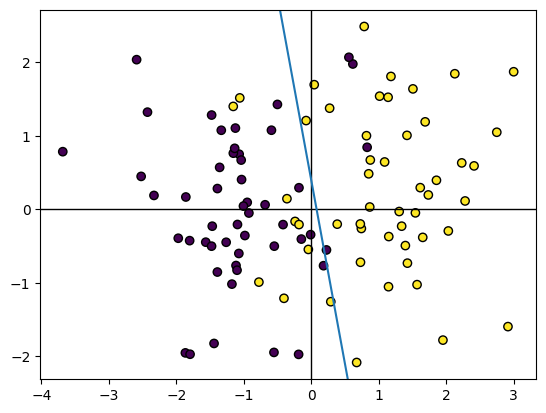

In [47]:
def plotmodel(w1, w2, b):
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2,4,50)
  y = (-w1*x - b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)


w1 = 5
w2 = 1
b = -0.4
plotmodel(w1, w2, b)

p=(-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

0 blue


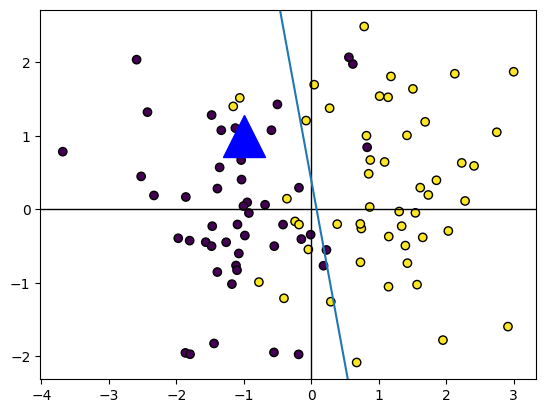

In [48]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b

  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'

p = (-1,1)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotmodel(w1,w2, b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)

In [49]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1


print("Acurácia: {0}".format(100*acertos/len(X)))

Acurácia: 87.0


## Camada Linear com Pytorch

- importa o módulo nn do pytorch
- na camada linear temos dois parâmetros:
  - in_features: dimensionalidade de entrada = n_valores
  - out_features: dimensionadade de saída = 1
  - bias: por padrão é True
- os pesos e o bias são inicializados de forma aleatória no pytorch.

In [36]:
import torch
from torch import nn

In [37]:
perceptron = nn.Linear(in_features=3, out_features=1, bias=True)
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


In [38]:
for name, tensor in perceptron.named_parameters():
 print(name, tensor.data)

weight tensor([[-0.2144, -0.0489,  0.1753]])
bias tensor([-0.2764])


In [39]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [40]:
def plot3D(perceptron):
  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()

  X1  = np.linspace(-1,1,10)
  X2  = np.linspace(-1,1,10)

  X1,X2 = np.meshgrid(X1,X2)

  X3 = (b-w1*X1-w2*X2)/w3

  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.view_init(azim=180)

  ax.plot_surface(X1, X2, X3, cmap='plasma')

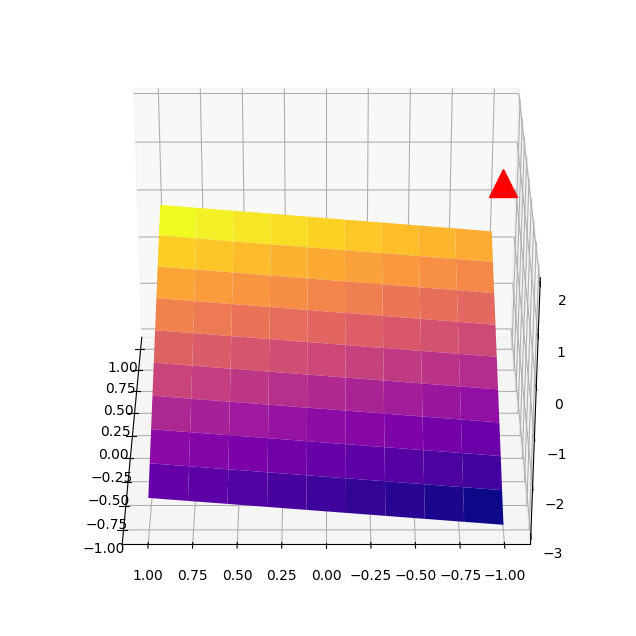

In [41]:
X = torch.Tensor([0, -1, 2])
y = perceptron(X)

plot3D(perceptron)
plt.plot([X[0]], [X[1]],[X[2]], color='r', marker='^', markersize=20)